# Import libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Persiapkan Data

### Import Data

In [2]:
population = pd.read_csv("Population.csv")

speed = pd.read_csv("Speed.csv")

internetusg=pd.read_csv("InternetUsage.csv")
newinternetusg=internetusg.groupby('nd', as_index=False).mean()

potsusg=pd.read_csv("POTSUsage.csv")
newpotsusg=potsusg.groupby('ncli', as_index=False).mean()

useeusg=pd.read_csv("UseeTVUsage.csv")
newuseeusg=useeusg.groupby('nd', as_index=False).mean()

ticket=pd.read_csv("Ticket.csv")
newticket=ticket.groupby('nd', as_index=False).mean()

revenue=pd.read_csv("Revenue.csv")
newrevenue=revenue.groupby('nd', as_index=False).mean()

payment=pd.read_csv("Payment.csv")
newpayment=payment.groupby('nd', as_index=False).mean()

In [3]:
data1=pd.merge(population,speed,on='nd',how='left')
data2=pd.merge(data1,newinternetusg,on='nd',how='left')
data3=pd.merge(data2,newpotsusg,on='ncli',how='left')
data4=pd.merge(data3,newuseeusg,on='nd',how='left')
data5=pd.merge(data4,newticket,on='nd',how='left')
data6=pd.merge(data5,newrevenue,on='nd',how='left')
data7=pd.merge(data6,newpayment,on='nd',how='left')
data7.shape


(100000, 42)

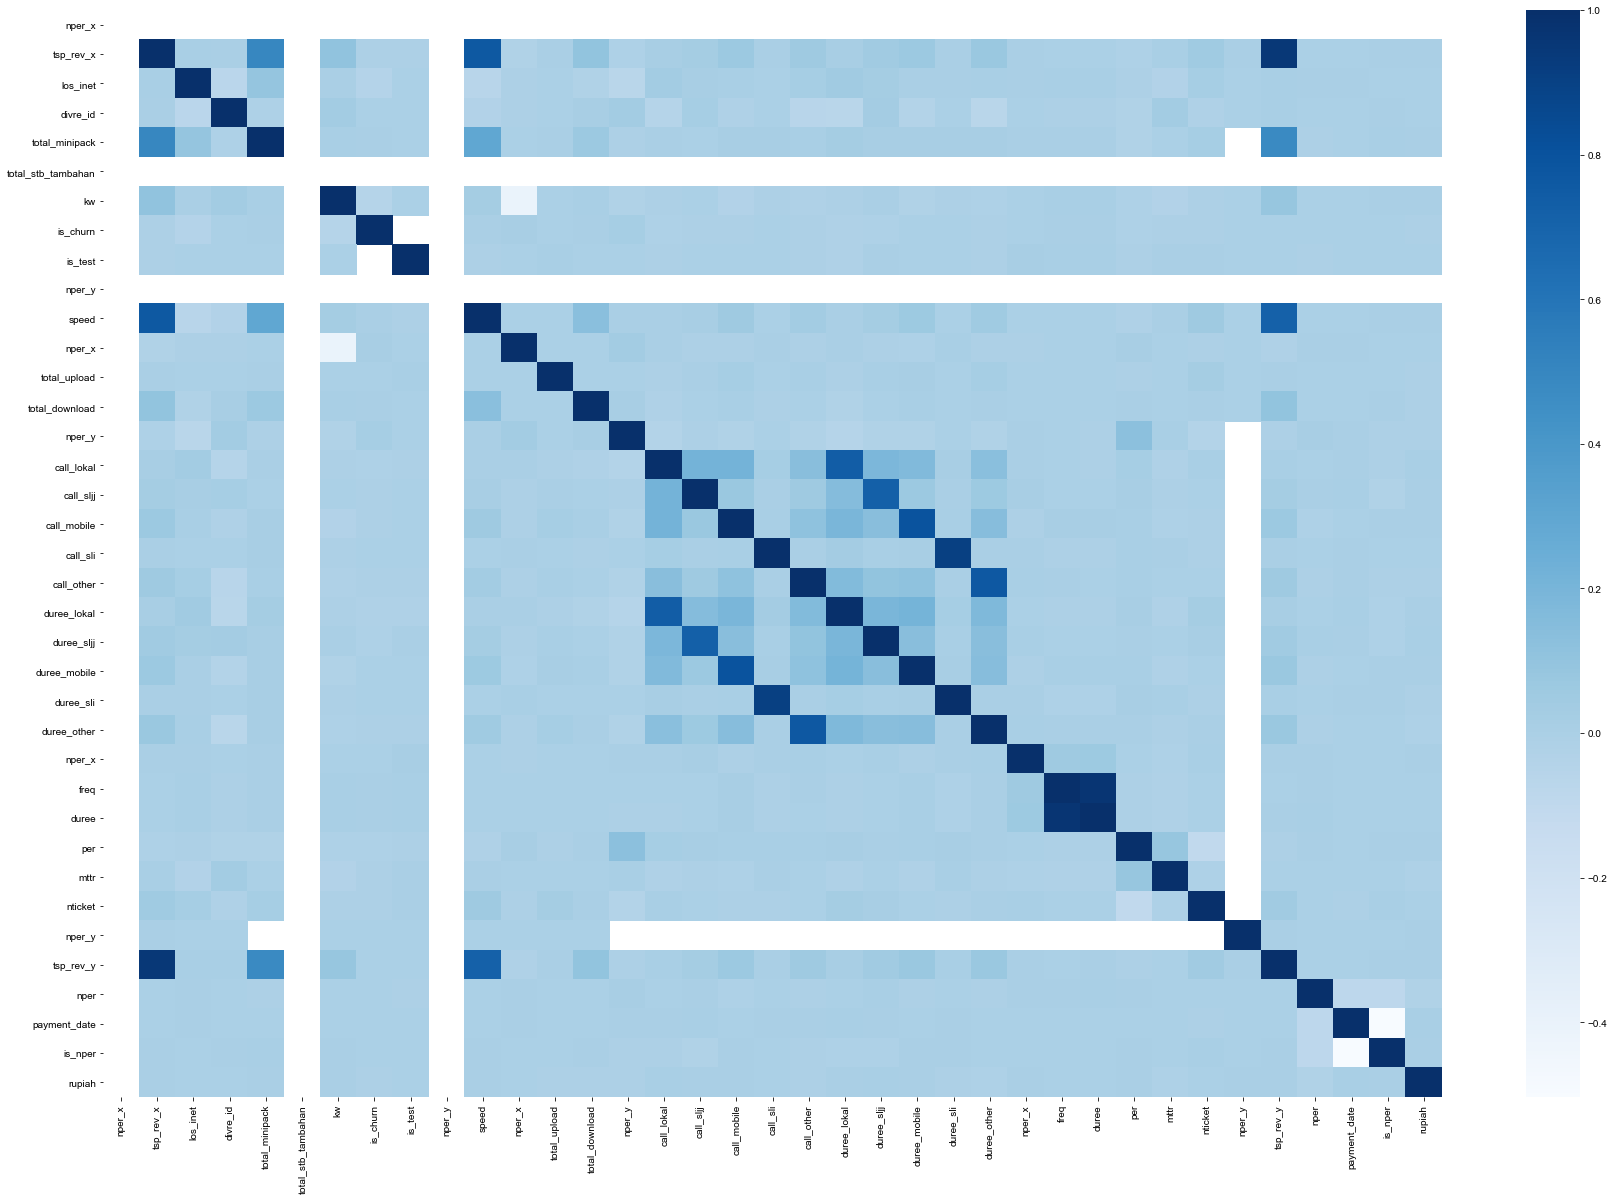

In [4]:
plt.figure(figsize=(30,20))
sns.heatmap(data7.corr(),cmap='Blues',annot=False) 
sns.set(font_scale=1)

In [5]:
data7.columns

Index(['nper_x', 'ncli', 'nd', 'nd_reference', 'tsp_rev_x', 'los_inet',
       'divre_id', 'technology', 'total_minipack', 'total_stb_tambahan', 'kw',
       'is_indihome', 'is_churn', 'is_test', 'nper_y', 'speed', 'nper_x',
       'total_upload', 'total_download', 'nper_y', 'call_lokal', 'call_sljj',
       'call_mobile', 'call_sli', 'call_other', 'duree_lokal', 'duree_sljj',
       'duree_mobile', 'duree_sli', 'duree_other', 'nper_x', 'freq', 'duree',
       'per', 'mttr', 'nticket', 'nper_y', 'tsp_rev_y', 'nper', 'payment_date',
       'is_nper', 'rupiah'],
      dtype='object')

#### pisah data training dan data testing

In [6]:
trainingdata=data7.loc[data7['is_test'] == 0]
testingdata=data7.loc[data7['is_test'] == 1]
print("Dimension of training data is " + str(trainingdata.shape[0]) + ", " + str(trainingdata.shape[1])
      + "\nDimension of testing data is " + str(testingdata.shape[0]) + ", " + str(testingdata.shape[1]))

Dimension of training data is 80000, 42
Dimension of testing data is 20000, 42


### Cross Tabulation

<ipython-input-7-47e9dd7dbc64>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceklosinet['los_inet_binned'] = pd.cut(ceklosinet['los_inet'], bins)


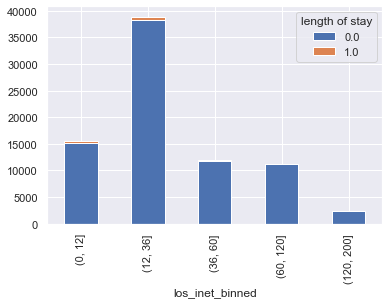

In [7]:
#Cross Tabulation Analysis on length of stay
ceklosinet=trainingdata[['los_inet','is_churn']]

#Creating bins for dividing period of length of stay
bins = [0, 12, 36, 60, 120, 200]
ceklosinet['los_inet_binned'] = pd.cut(ceklosinet['los_inet'], bins)
losinet=pd.crosstab(ceklosinet.los_inet_binned,ceklosinet.is_churn)

#Create Graphs
losinet.plot.bar(stacked=True)
plt.legend(title='length of stay')
plt.show()

# Lakukan Data Wrangling untuk Training Data

### Drop kolom-kolom yang tidak relevan<br>


In [8]:
trainingdata.columns

Index(['nper_x', 'ncli', 'nd', 'nd_reference', 'tsp_rev_x', 'los_inet',
       'divre_id', 'technology', 'total_minipack', 'total_stb_tambahan', 'kw',
       'is_indihome', 'is_churn', 'is_test', 'nper_y', 'speed', 'nper_x',
       'total_upload', 'total_download', 'nper_y', 'call_lokal', 'call_sljj',
       'call_mobile', 'call_sli', 'call_other', 'duree_lokal', 'duree_sljj',
       'duree_mobile', 'duree_sli', 'duree_other', 'nper_x', 'freq', 'duree',
       'per', 'mttr', 'nticket', 'nper_y', 'tsp_rev_y', 'nper', 'payment_date',
       'is_nper', 'rupiah'],
      dtype='object')

In [9]:
trainingdata.drop(['nper_x','ncli','nd_reference','divre_id','is_test','nper_y'], axis=1,inplace=True)
trainingdata.columns

C:\Users\950193\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['nd', 'tsp_rev_x', 'los_inet', 'technology', 'total_minipack',
       'total_stb_tambahan', 'kw', 'is_indihome', 'is_churn', 'speed',
       'total_upload', 'total_download', 'call_lokal', 'call_sljj',
       'call_mobile', 'call_sli', 'call_other', 'duree_lokal', 'duree_sljj',
       'duree_mobile', 'duree_sli', 'duree_other', 'freq', 'duree', 'per',
       'mttr', 'nticket', 'tsp_rev_y', 'nper', 'payment_date', 'is_nper',
       'rupiah'],
      dtype='object')

In [10]:
trainingdata.is_churn.value_counts()

0.0    78788
1.0     1212
Name: is_churn, dtype: int64

### Pisah data menjadi data Input dan output 

In [11]:
def extractInputOutput(data, output_column_name):
    
    data_output = data[output_column_name] 
    data_input = data.drop(output_column_name, axis = 1)
    
    return data_input, data_output

In [12]:
x, y = extractInputOutput(trainingdata, 'is_churn')

In [13]:
x.head()

,nd,tsp_rev_x,los_inet,technology,total_minipack,total_stb_tambahan,kw,is_indihome,speed,total_upload,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
0,7a6d46fdf5178a3958bc7d8c1ae8f04e,308000,112.032258,FIBER,2.0,NaN,4,3P,2048.0,11259.166667,...,71.714286,2451.025714,NaN,NaN,NaN,326333.333333,3.5,24.500000,1.000000,33000.00
1,1da05afd6c119bbf9b2a20ef14f6c4e3,275000,6.752091,FIBER,NaN,NaN,4,2P,20480.0,11727.666667,...,5.000000,171.792500,NaN,NaN,NaN,278911.166667,3.5,15.916667,1.000000,382309.75
3,76ab63eb2417d3d559441431c7c284c5,242000,12.483871,FIBER,NaN,NaN,4,2P,10240.0,40121.166667,...,19.200000,360.492000,NaN,NaN,NaN,242000.000000,3.5,20.666667,1.000000,250616.75
4,3718f4061953ab65d61b570ea5b9be86,286000,20.483871,FIBER,NaN,NaN,4,3P,10240.0,9885.500000,...,47.000000,1487.015000,5.0,0.79,1.0,286000.000000,5.5,2.500000,1.000000,346500.00
5,412822bbf8691f66f377a9a41c29e216,330000,19.548387,FIBER,NaN,NaN,4,2P,20480.0,54983.500000,...,NaN,NaN,NaN,NaN,NaN,330000.000000,3.5,20.666667,0.916667,239250.00


In [14]:
y.head()

0    0.0
1    0.0
3    0.0
4    0.0
5    0.0
Name: is_churn, dtype: float64

In [15]:
y.value_counts()

0.0    78788
1.0     1212
Name: is_churn, dtype: int64

### Pisah data input dan output menjadi training set dan testing set

In [16]:
from sklearn.model_selection import train_test_split

train : test proportion = 70 : 30

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [18]:
print("Dimension of x_train data is " + str(x_train.shape[0]) + ", " + str(x_train.shape[1])
      + "\nDimension of y_train data is " + str(y_train.shape[0]) + ", 0"
      + "\nDimension of x_test data is " + str(x_test.shape[0]) + ", " + str(x_test.shape[1])
      + "\nDimension of y_test data is " + str(y_test.shape[0]) + ", 0")

Dimension of x_train data is 56000, 31
Dimension of y_train data is 56000, 0
Dimension of x_test data is 24000, 31
Dimension of y_test data is 24000, 0


In [19]:
y_train.value_counts()

0.0    55134
1.0      866
Name: is_churn, dtype: int64

In [20]:
y_test.value_counts()

0.0    23654
1.0      346
Name: is_churn, dtype: int64

In [21]:
x_test.columns

Index(['nd', 'tsp_rev_x', 'los_inet', 'technology', 'total_minipack',
       'total_stb_tambahan', 'kw', 'is_indihome', 'speed', 'total_upload',
       'total_download', 'call_lokal', 'call_sljj', 'call_mobile', 'call_sli',
       'call_other', 'duree_lokal', 'duree_sljj', 'duree_mobile', 'duree_sli',
       'duree_other', 'freq', 'duree', 'per', 'mttr', 'nticket', 'tsp_rev_y',
       'nper', 'payment_date', 'is_nper', 'rupiah'],
      dtype='object')

### Mensolusikan Imbalanced Data

In [22]:
from sklearn.utils import resample

#concatenate our training data back together
X = pd.concat([x_train, y_train], axis=1)

#separate minority and majority classes
df_majority = X[X.is_churn==0]
df_minority = X[X.is_churn==1]

#upsample minority
df_minority_upsampled = resample(df_minority,
                          replace=True, # sample with replacement
                          n_samples=len(df_majority), # match number in majority class
                          random_state=123) # reproducible results

#combine majority and upsampled minority
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#check new class counts
df_upsampled.is_churn.value_counts()

1.0    55134
0.0    55134
Name: is_churn, dtype: int64

## Split ulang data

In [23]:
x, y = extractInputOutput(df_upsampled, 'is_churn')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [24]:
print("Dimension of x_train data is " + str(x_train.shape[0]) + ", " + str(x_train.shape[1])
      + "\nDimension of y_train data is " + str(y_train.shape[0]) + ", 0"
      + "\nDimension of x_test data is " + str(x_test.shape[0]) + ", " + str(x_test.shape[1])
      + "\nDimension of y_test data is " + str(y_test.shape[0]) + ", 0")

Dimension of x_train data is 77187, 31
Dimension of y_train data is 77187, 0
Dimension of x_test data is 33081, 31
Dimension of y_test data is 33081, 0


In [25]:
y_train.value_counts()

1.0    38681
0.0    38506
Name: is_churn, dtype: int64

In [26]:
y_test.value_counts()

0.0    16628
1.0    16453
Name: is_churn, dtype: int64

In [27]:
x_test.columns

Index(['nd', 'tsp_rev_x', 'los_inet', 'technology', 'total_minipack',
       'total_stb_tambahan', 'kw', 'is_indihome', 'speed', 'total_upload',
       'total_download', 'call_lokal', 'call_sljj', 'call_mobile', 'call_sli',
       'call_other', 'duree_lokal', 'duree_sljj', 'duree_mobile', 'duree_sli',
       'duree_other', 'freq', 'duree', 'per', 'mttr', 'nticket', 'tsp_rev_y',
       'nper', 'payment_date', 'is_nper', 'rupiah'],
      dtype='object')

### Pisah data numerical dan categorical untuk memudahkan data imputation

In [28]:
categorical = ["technology", "is_indihome"]
numerical = list(x_train.drop(categorical, axis = 1))

### Numerical Imputation

In [29]:
x_train_numerical = x_train[numerical]

In [30]:
x_train_numerical.isnull().sum()

nd                        0
tsp_rev_x                 0
los_inet                  0
total_minipack        34812
total_stb_tambahan    75536
kw                        0
speed                  5794
total_upload           1985
total_download         1985
call_lokal            61132
call_sljj             61132
call_mobile           61132
call_sli              61132
call_other            61132
duree_lokal           61132
duree_sljj            61132
duree_mobile          61132
duree_sli             61132
duree_other           61132
freq                  52241
duree                 52241
per                   53038
mttr                  53038
nticket               53038
tsp_rev_y                 0
nper                      0
payment_date              0
is_nper                   0
rupiah                    0
dtype: int64

In [31]:
from sklearn.impute import SimpleImputer
import numpy as np

In [32]:
#Set numerical imputation strategy
imput_numerical = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value=0)

#Imputation function
def numericalImputation(data, numerical_columns):
    numerical_data = data[numerical_columns]
    imput_numerical.fit(numerical_data)
    
    numerical_data = pd.DataFrame(imput_numerical.transform(numerical_data), index = data.index)
    numerical_data.columns = numerical_columns
    return  numerical_data, imput_numerical

#Numerical imputation
x_train_numerical, imput_numerical = numericalImputation(data = x_train_numerical, 
                                                         numerical_columns = numerical)

In [33]:
x_train_numerical.isnull().sum()

nd                    0
tsp_rev_x             0
los_inet              0
total_minipack        0
total_stb_tambahan    0
kw                    0
speed                 0
total_upload          0
total_download        0
call_lokal            0
call_sljj             0
call_mobile           0
call_sli              0
call_other            0
duree_lokal           0
duree_sljj            0
duree_mobile          0
duree_sli             0
duree_other           0
freq                  0
duree                 0
per                   0
mttr                  0
nticket               0
tsp_rev_y             0
nper                  0
payment_date          0
is_nper               0
rupiah                0
dtype: int64

In [34]:
x_train_numerical.head()

,nd,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
18331,af807b1b03effa63e6d7ba5e0cadc681,484000,8.87276,2,0,4,20480,22914.7,369105,0,...,0,0,0,0,0,484000,3.5,12.0833,1,241552
10327,9eef209f742959291507ae5f5fc39bd6,500500,43.0824,1,0,4,10240,16275.2,249524,10.3333,...,4,58.63,2,11.435,2,568645,3.5,9.16667,1,418000
69283,2c555478e544d40eab44cc3c57a3e080,324500,22.129,1,0,4,10240,15044.3,187725,0,...,0,0,0,0,0,279323,3.5,19.8333,1,33000
1325,d09e350dee529bf49702a50609f9bf63,297000,22.6129,0,0,4,20480,15953.3,275064,0,...,15.25,445.692,6,14.74,1,297000,4.25,16.8333,1,263999
61106,4a543f5616fa51cce70f1ef067152f4c,269500,18.5161,0,0,4,10240,21515,483683,0,...,0,0,2,5.79,1,269500,3.5,13.5,1,542726


In [35]:
x_train_numerical.shape

(77187, 29)

### Olah variabel categorical menjadi variabel dummy

In [36]:
x_train_categorical = x_train[categorical]

In [37]:
x_train_categorical.isnull().sum()

technology     7
is_indihome    0
dtype: int64

In [38]:
#Categorical imputation function
def categoricalImputation(data, categorical_columns):
    categorical_data = data[categorical_columns].fillna(value="BLANK")
    return  categorical_data

#Categorical imputation
x_train_categorical = categoricalImputation(data = x_train_categorical, 
                                            categorical_columns = categorical)

In [39]:
x_train_categorical['technology'].value_counts()

FIBER        74574
NON-FIBER     2606
BLANK            7
Name: technology, dtype: int64

In [40]:
x_train_categorical['is_indihome'].value_counts()

3P    47032
2P    30155
Name: is_indihome, dtype: int64

In [41]:
#Dummy variable function
def dummyVariables(data, categorical_columns):
    data_cat = data[categorical_columns]
    data_cat = pd.get_dummies(data = data_cat, prefix = categorical_columns)
    #prefix untuk memberikan nama depan di variable dummy sesuai dengan nama variable aslinya
    
    return data_cat

#Set Dummy variable
categorical_dummies = dummyVariables(data = x_train_categorical, categorical_columns = categorical)

In [42]:
categorical_dummies.head()

,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
18331,0,1,0,0,1
10327,0,1,0,0,1
69283,0,1,0,0,1
1325,0,1,0,0,1
61106,0,0,1,1,0


In [43]:
categorical_dummies.shape

(77187, 5)

### Gabungkan data numerical dan categorical

In [44]:
x_train = pd.concat([x_train_numerical, categorical_dummies], axis =1)

In [45]:
x_train.shape

(77187, 34)

In [46]:
x_train.head()

,nd,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
18331,af807b1b03effa63e6d7ba5e0cadc681,484000,8.87276,2,0,4,20480,22914.7,369105,0,...,484000,3.5,12.0833,1,241552,0,1,0,0,1
10327,9eef209f742959291507ae5f5fc39bd6,500500,43.0824,1,0,4,10240,16275.2,249524,10.3333,...,568645,3.5,9.16667,1,418000,0,1,0,0,1
69283,2c555478e544d40eab44cc3c57a3e080,324500,22.129,1,0,4,10240,15044.3,187725,0,...,279323,3.5,19.8333,1,33000,0,1,0,0,1
1325,d09e350dee529bf49702a50609f9bf63,297000,22.6129,0,0,4,20480,15953.3,275064,0,...,297000,4.25,16.8333,1,263999,0,1,0,0,1
61106,4a543f5616fa51cce70f1ef067152f4c,269500,18.5161,0,0,4,10240,21515,483683,0,...,269500,3.5,13.5,1,542726,0,0,1,1,0


In [47]:
x_train.columns

Index(['nd', 'tsp_rev_x', 'los_inet', 'total_minipack', 'total_stb_tambahan',
       'kw', 'speed', 'total_upload', 'total_download', 'call_lokal',
       'call_sljj', 'call_mobile', 'call_sli', 'call_other', 'duree_lokal',
       'duree_sljj', 'duree_mobile', 'duree_sli', 'duree_other', 'freq',
       'duree', 'per', 'mttr', 'nticket', 'tsp_rev_y', 'nper', 'payment_date',
       'is_nper', 'rupiah', 'technology_BLANK', 'technology_FIBER',
       'technology_NON-FIBER', 'is_indihome_2P', 'is_indihome_3P'],
      dtype='object')

#### Standardizing

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
def standardizer(data):
    data_columns = data.columns
    data_index = data.index
    normalize = StandardScaler()
    normalize.fit(data)
    
    normalized_data = pd.DataFrame(normalize.transform(data), index = data_index)
    normalized_data.columns = data_columns
    return normalized_data, normalize

In [50]:
x_train=x_train.set_index('nd')
x_train

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,,,,,,,,,,,,,,,,,
af807b1b03effa63e6d7ba5e0cadc681,484000,8.87276,2,0,4,20480,22914.7,369105,0,0,...,484000,3.5,12.0833,1,241552,0,1,0,0,1
9eef209f742959291507ae5f5fc39bd6,500500,43.0824,1,0,4,10240,16275.2,249524,10.3333,0,...,568645,3.5,9.16667,1,418000,0,1,0,0,1
2c555478e544d40eab44cc3c57a3e080,324500,22.129,1,0,4,10240,15044.3,187725,0,0,...,279323,3.5,19.8333,1,33000,0,1,0,0,1
d09e350dee529bf49702a50609f9bf63,297000,22.6129,0,0,4,20480,15953.3,275064,0,0,...,297000,4.25,16.8333,1,263999,0,1,0,0,1
4a543f5616fa51cce70f1ef067152f4c,269500,18.5161,0,0,4,10240,21515,483683,0,0,...,269500,3.5,13.5,1,542726,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3af4b7efb350b674896cf42141f34906,445500,8.48387,3,0,4,20480,16562.5,285241,0,0,...,425394,3.5,19.6667,1,478500,0,1,0,0,1
8bbc40aef6d55a3193f7d1811a6d9660,341000,7.80645,1,0,4,10240,11254.2,176226,0,0,...,341000,3.5,18.3333,1,28440.8,0,1,0,0,1
9ec0e5b07cb73fd03924aa2b646cae27,357500,20.8387,1,0,4,10240,8650.33,109698,0,0,...,357500,3.5,19.1667,1,454489,0,1,0,0,1


In [51]:
x_train_std, normalize = standardizer(x_train)
x_train_std.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,,,,,,,,,,,,,,,,,
af807b1b03effa63e6d7ba5e0cadc681,0.673596,-0.793643,0.794195,-0.147842,0.265202,0.375892,-0.075953,0.035856,-0.123409,-0.071059,...,0.694654,-0.183623,-0.626132,0.216167,0.047982,-0.009524,0.187187,-0.186927,-0.800724,0.800724
9eef209f742959291507ae5f5fc39bd6,0.766676,0.430658,-0.003929,-0.147842,0.265202,-0.366852,-0.158019,-0.099034,0.518362,-0.071059,...,1.188206,-0.183623,-1.185196,0.216167,1.093834,-0.009524,0.187187,-0.186927,-0.800724,0.800724
2c555478e544d40eab44cc3c57a3e080,-0.226180,-0.319225,-0.003929,-0.147842,0.265202,-0.366852,-0.173233,-0.168746,-0.123409,-0.071059,...,-0.498786,-0.183623,0.859382,0.216167,-1.188159,-0.009524,0.187187,-0.186927,-0.800724,0.800724
d09e350dee529bf49702a50609f9bf63,-0.381314,-0.301909,-0.802054,-0.147842,0.265202,0.375892,-0.161997,-0.070225,-0.123409,-0.071059,...,-0.395715,2.626339,0.284345,0.216167,0.181032,-0.009524,0.187187,-0.186927,-0.800724,0.800724
4a543f5616fa51cce70f1ef067152f4c,-0.536448,-0.448524,-0.802054,-0.147842,0.265202,-0.366852,-0.093253,0.165104,-0.123409,-0.071059,...,-0.556063,-0.183623,-0.354586,0.216167,1.833116,-0.009524,-5.342248,5.349669,1.248869,-1.248869


### Dimentional Reduction for Selecting Important Features

In [52]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

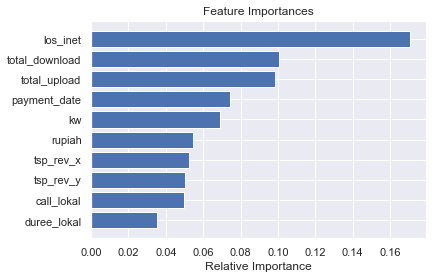

In [53]:
#Fit model
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(x_train_std,y_train)

#Calculate feature importance and show in barchart
features = x_train_std.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [54]:
#features=["payment_date","los_inet","total_download","total_upload","is_nper","kw","tsp_rev_x","rupiah","tsp_rev_y","per"]

In [55]:
features=["los_inet","total_download","total_upload","kw","tsp_rev_x","tsp_rev_y","call_lokal","duree_lokal", "mttr", "per"]

In [56]:
features

['los_inet',
 'total_download',
 'total_upload',
 'kw',
 'tsp_rev_x',
 'tsp_rev_y',
 'call_lokal',
 'duree_lokal',
 'mttr',
 'per']

In [57]:
x_train_std_feat=x_train_std[features]

In [58]:
x_train_std_feat.columns

Index(['los_inet', 'total_download', 'total_upload', 'kw', 'tsp_rev_x',
       'tsp_rev_y', 'call_lokal', 'duree_lokal', 'mttr', 'per'],
      dtype='object')

In [59]:
x_train_feat=x_train[features]

In [60]:
x_train_feat.columns

Index(['los_inet', 'total_download', 'total_upload', 'kw', 'tsp_rev_x',
       'tsp_rev_y', 'call_lokal', 'duree_lokal', 'mttr', 'per'],
      dtype='object')

In [61]:
x_train_std_feat

,los_inet,total_download,total_upload,kw,tsp_rev_x,tsp_rev_y,call_lokal,duree_lokal,mttr,per
nd,,,,,,,,,,
af807b1b03effa63e6d7ba5e0cadc681,-0.793643,0.035856,-0.075953,0.265202,0.673596,0.694654,-0.123409,-0.145558,-0.239820,-0.618366
9eef209f742959291507ae5f5fc39bd6,0.430658,-0.099034,-0.158019,0.265202,0.766676,1.188206,0.518362,0.857245,0.655772,0.320446
2c555478e544d40eab44cc3c57a3e080,-0.319225,-0.168746,-0.173233,0.265202,-0.226180,-0.498786,-0.123409,-0.145558,-0.239820,-0.618366
d09e350dee529bf49702a50609f9bf63,-0.301909,-0.070225,-0.161997,0.265202,-0.381314,-0.395715,-0.123409,-0.145558,0.914621,2.198071
4a543f5616fa51cce70f1ef067152f4c,-0.448524,0.165104,-0.093253,0.265202,-0.536448,-0.556063,-0.123409,-0.145558,0.213655,0.320446
...,...,...,...,...,...,...,...,...,...,...
3af4b7efb350b674896cf42141f34906,-0.807560,-0.058745,-0.154468,0.265202,0.456408,0.352928,-0.123409,-0.145558,-0.239820,-0.618366
8bbc40aef6d55a3193f7d1811a6d9660,-0.831804,-0.181718,-0.220081,0.265202,-0.133100,-0.139157,-0.123409,-0.145558,-0.239820,-0.618366
9ec0e5b07cb73fd03924aa2b646cae27,-0.365404,-0.256763,-0.252265,0.265202,-0.040020,-0.042948,-0.123409,-0.145558,-0.239820,-0.618366


# Train Machine Learning

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from joblib import dump, load

In [63]:
from scipy import stats
from scipy.stats import zscore
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, roc_auc_score, log_loss, classification_report
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [64]:
ridge = RidgeClassifier(alpha=0.5)
ridge.fit(x_train_std_feat, y_train)

gradboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001)
gradboost.fit(x_train_std_feat, y_train)

adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.001)
adaboost.fit(x_train_std_feat, y_train)


bagging = BaggingClassifier(n_estimators=100)
bagging.fit(x_train_std_feat, y_train)

knn = KNeighborsClassifier(leaf_size=20, n_neighbors=3, p=2)
knn.fit(x_train_std_feat, y_train)

decTree = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=0.75,
                       min_samples_leaf=40, random_state=123)
decTree.fit(x_train_std_feat, y_train)


logreg = LogisticRegression(C=100, class_weight='balanced', fit_intercept='True',
                   max_iter=1000, random_state=123, solver='liblinear')
logreg.fit(x_train_std_feat, y_train)


RandForest = RandomForestClassifier(n_estimators=100,min_samples_leaf=3, random_state=123)
RandForest.fit(x_train_std_feat, y_train)


RandomForestClassifier(min_samples_leaf=3, random_state=123)

## Test Model

### Preprocessing test data

In [65]:
x_test.head()

,nd,tsp_rev_x,los_inet,technology,total_minipack,total_stb_tambahan,kw,is_indihome,speed,total_upload,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
79405,ac01aef38b957901c355e7a2f2116f76,346500,19.451613,FIBER,1.0,NaN,4,3P,10240.0,3696.000000,...,NaN,NaN,NaN,NaN,NaN,346500.000000,3.500,14.166667,1.0,49929.000000
2158,0823b38018849e02adbfb4964969e361,489500,11.903226,FIBER,2.0,NaN,4,3P,20480.0,31144.000000,...,70.2,2324.97,4.0,10.470,1.0,471495.833333,3.500,13.833333,1.0,360309.166667
67594,b75e17e12eb98c6e0c379bc0d42237fb,361900,10.129032,NON-FIBER,NaN,NaN,2,2P,NaN,NaN,...,NaN,NaN,3.0,8.115,2.0,361900.000000,3.500,9.583333,1.0,103913.333333
52122,3e7695a84ac6d0f08ec7478d48ae354f,352000,9.096774,FIBER,3.0,NaN,4,3P,10240.0,27723.333333,...,NaN,NaN,NaN,NaN,NaN,343010.666667,3.500,16.500000,1.0,544015.000000
97084,6554b31db45de8bd9127e7428034a272,374000,6.381123,FIBER,3.0,NaN,4,3P,20480.0,81230.833333,...,NaN,NaN,NaN,NaN,NaN,352917.000000,3.625,13.250000,1.0,188650.125000


In [66]:
testcategorical = ["technology", "is_indihome"]
testnumerical = list(x_test.drop(categorical, axis = 1))

In [67]:
x_test_numerical = x_test[testnumerical]

In [68]:
x_test_numerical.head()

,nd,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
79405,ac01aef38b957901c355e7a2f2116f76,346500,19.451613,1.0,NaN,4,10240.0,3696.000000,104337.833333,NaN,...,NaN,NaN,NaN,NaN,NaN,346500.000000,3.500,14.166667,1.0,49929.000000
2158,0823b38018849e02adbfb4964969e361,489500,11.903226,2.0,NaN,4,20480.0,31144.000000,342117.500000,NaN,...,70.2,2324.97,4.0,10.470,1.0,471495.833333,3.500,13.833333,1.0,360309.166667
67594,b75e17e12eb98c6e0c379bc0d42237fb,361900,10.129032,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,8.115,2.0,361900.000000,3.500,9.583333,1.0,103913.333333
52122,3e7695a84ac6d0f08ec7478d48ae354f,352000,9.096774,3.0,NaN,4,10240.0,27723.333333,230613.166667,NaN,...,NaN,NaN,NaN,NaN,NaN,343010.666667,3.500,16.500000,1.0,544015.000000
97084,6554b31db45de8bd9127e7428034a272,374000,6.381123,3.0,NaN,4,20480.0,81230.833333,919847.500000,0.0,...,NaN,NaN,NaN,NaN,NaN,352917.000000,3.625,13.250000,1.0,188650.125000


In [69]:
x_test_numerical.isnull().sum()

nd                        0
tsp_rev_x                 0
los_inet                  0
total_minipack        14880
total_stb_tambahan    32347
kw                        0
speed                  2411
total_upload            849
total_download          849
call_lokal            26184
call_sljj             26184
call_mobile           26184
call_sli              26184
call_other            26184
duree_lokal           26184
duree_sljj            26184
duree_mobile          26184
duree_sli             26184
duree_other           26184
freq                  22207
duree                 22207
per                   22739
mttr                  22739
nticket               22739
tsp_rev_y                 0
nper                      0
payment_date              0
is_nper                   0
rupiah                    0
dtype: int64

In [70]:
imput_numerical = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value=0)

In [71]:
def numericalImputation(data, numerical_columns):
    numerical_data = data[numerical_columns]
    imput_numerical.fit(numerical_data)
    
    numerical_data = pd.DataFrame(imput_numerical.transform(numerical_data), index = data.index)
    numerical_data.columns = numerical_columns
    return  numerical_data, imput_numerical

In [72]:
x_test_numerical, imput_numerical = numericalImputation(data = x_test_numerical, 
                                                         numerical_columns = numerical)

In [73]:
x_test_numerical.isnull().sum()

nd                    0
tsp_rev_x             0
los_inet              0
total_minipack        0
total_stb_tambahan    0
kw                    0
speed                 0
total_upload          0
total_download        0
call_lokal            0
call_sljj             0
call_mobile           0
call_sli              0
call_other            0
duree_lokal           0
duree_sljj            0
duree_mobile          0
duree_sli             0
duree_other           0
freq                  0
duree                 0
per                   0
mttr                  0
nticket               0
tsp_rev_y             0
nper                  0
payment_date          0
is_nper               0
rupiah                0
dtype: int64

In [74]:
x_test_numerical.head()

,nd,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,...,freq,duree,per,mttr,nticket,tsp_rev_y,nper,payment_date,is_nper,rupiah
79405,ac01aef38b957901c355e7a2f2116f76,346500,19.4516,1,0,4,10240,3696,104338,0,...,0,0,0,0,0,346500,3.5,14.1667,1,49929
2158,0823b38018849e02adbfb4964969e361,489500,11.9032,2,0,4,20480,31144,342118,0,...,70.2,2324.97,4,10.47,1,471496,3.5,13.8333,1,360309
67594,b75e17e12eb98c6e0c379bc0d42237fb,361900,10.129,0,0,2,0,0,0,0,...,0,0,3,8.115,2,361900,3.5,9.58333,1,103913
52122,3e7695a84ac6d0f08ec7478d48ae354f,352000,9.09677,3,0,4,10240,27723.3,230613,0,...,0,0,0,0,0,343011,3.5,16.5,1,544015
97084,6554b31db45de8bd9127e7428034a272,374000,6.38112,3,0,4,20480,81230.8,919848,0,...,0,0,0,0,0,352917,3.625,13.25,1,188650


In [75]:
x_test_numerical.shape

(33081, 29)

In [76]:
x_test_categorical = x_test[categorical]

In [77]:
x_test_categorical.isnull().sum()

technology     3
is_indihome    0
dtype: int64

In [78]:
x_test_categorical = categoricalImputation(data = x_test_categorical, 
                                            categorical_columns = categorical)

In [79]:
x_test_categorical['technology'].value_counts(normalize=True)

FIBER        0.967292
NON-FIBER    0.032617
BLANK        0.000091
Name: technology, dtype: float64

In [80]:
x_test_categorical['is_indihome'].value_counts(normalize=True)

3P    0.609655
2P    0.390345
Name: is_indihome, dtype: float64

In [81]:
categorical_dummies = dummyVariables(data = x_test_categorical, categorical_columns = categorical)

In [82]:
categorical_dummies.head()

,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
79405,0,1,0,0,1
2158,0,1,0,0,1
67594,0,0,1,1,0
52122,0,1,0,0,1
97084,0,1,0,0,1


In [83]:
categorical_dummies.shape

(33081, 5)

In [84]:
x_test = pd.concat([x_test_numerical, categorical_dummies], axis =1)

In [85]:
x_test.shape

(33081, 34)

In [86]:
x_test=x_test.set_index('nd')
x_test.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,,,,,,,,,,,,,,,,,
ac01aef38b957901c355e7a2f2116f76,346500,19.4516,1,0,4,10240,3696,104338,0,0,...,346500,3.5,14.1667,1,49929,0,1,0,0,1
0823b38018849e02adbfb4964969e361,489500,11.9032,2,0,4,20480,31144,342118,0,0,...,471496,3.5,13.8333,1,360309,0,1,0,0,1
b75e17e12eb98c6e0c379bc0d42237fb,361900,10.129,0,0,2,0,0,0,0,0,...,361900,3.5,9.58333,1,103913,0,0,1,1,0
3e7695a84ac6d0f08ec7478d48ae354f,352000,9.09677,3,0,4,10240,27723.3,230613,0,0,...,343011,3.5,16.5,1,544015,0,1,0,0,1
6554b31db45de8bd9127e7428034a272,374000,6.38112,3,0,4,20480,81230.8,919848,0,3,...,352917,3.625,13.25,1,188650,0,1,0,0,1


In [87]:
x_test_std, normalize = standardizer(x_test)

In [88]:
x_test_std.head()

,tsp_rev_x,los_inet,total_minipack,total_stb_tambahan,kw,speed,total_upload,total_download,call_lokal,call_sljj,...,tsp_rev_y,nper,payment_date,is_nper,rupiah,technology_BLANK,technology_FIBER,technology_NON-FIBER,is_indihome_2P,is_indihome_3P
nd,,,,,,,,,,,,,,,,,,,,,
ac01aef38b957901c355e7a2f2116f76,-0.096166,-0.415843,-0.011722,-0.150637,0.261146,-0.362547,-0.316330,-0.261814,-0.139644,-0.022073,...,-0.099562,-0.186059,-0.224701,0.215273,-1.081241,-0.009523,0.183885,-0.183621,-0.800170,0.800170
0823b38018849e02adbfb4964969e361,0.724286,-0.684168,0.781307,-0.150637,0.261146,0.378420,0.034757,0.011091,-0.139644,-0.022073,...,0.644213,-0.186059,-0.290085,0.215273,0.749988,-0.009523,0.183885,-0.183621,-0.800170,0.800170
b75e17e12eb98c6e0c379bc0d42237fb,-0.007809,-0.747236,-0.804752,-0.150637,-3.829276,-1.103514,-0.363605,-0.381564,-0.139644,-0.022073,...,-0.007926,-0.186059,-1.123721,0.215273,-0.762736,-0.009523,-5.438192,5.446003,1.249735,-1.249735
3e7695a84ac6d0f08ec7478d48ae354f,-0.064610,-0.783931,1.574336,-0.150637,0.261146,-0.362547,-0.008996,-0.116885,-0.139644,-0.022073,...,-0.120325,-0.186059,0.232982,0.215273,1.833845,-0.009523,0.183885,-0.183621,-0.800170,0.800170
6554b31db45de8bd9127e7428034a272,0.061613,-0.880465,1.574336,-0.150637,0.261146,0.378420,0.675417,0.674162,-0.139644,0.169977,...,-0.061378,0.279529,-0.404505,0.215273,-0.262793,-0.009523,0.183885,-0.183621,-0.800170,0.800170


In [89]:
x_test_std_feat=x_test_std[features]

In [90]:
x_test_std_feat.columns

Index(['los_inet', 'total_download', 'total_upload', 'kw', 'tsp_rev_x',
       'tsp_rev_y', 'call_lokal', 'duree_lokal', 'mttr', 'per'],
      dtype='object')

In [91]:
y_test.shape

(33081,)

## Evaluasi Setiap Model menggunakan Accuracy dan ROC Score

In [92]:
def eval_model(x, y, clf):
    pred = clf.predict(x)
    proba = clf.predict_proba(x)[:,1]
    clf_report = classification_report(y, pred)
    cnf_matrix = confusion_matrix(y, pred, labels=[0,1])
    print ("Accuracy  : %.5f" % accuracy_score(y, pred))
    print ("AUC score : %.5f" % roc_auc_score(y, proba))
    print ("Precision score : %.5f" % precision_score(y, pred))
    print ("Recall score : %.5f" % recall_score(y, pred))
    print ("F1 Score score : %.5f" % f1_score(y, pred))
    print ("Confusion Matrix : \n",cnf_matrix)

In [93]:
def eval_model2(x, y, clf):
    pred = clf.predict(x)
    clf_report = classification_report(y, pred)
    cnf_matrix = confusion_matrix(y, pred, labels=[0,1])
    print ("Accuracy  : %.5f" % accuracy_score(y, pred))
    print ("AUC score : %.5f" % roc_auc_score(y, pred))
    print ("Precision score : %.5f" % precision_score(y, pred))
    print ("Recall score : %.5f" % recall_score(y, pred))
    print ("F1 Score score : %.5f" % f1_score(y, pred))
    print ("Confusion Matrix : \n",cnf_matrix)

In [94]:
classifiers = [ridge, gradboost, adaboost, bagging, knn, decTree, logreg, RandForest]
label = ['RIDGE CLASSIFIER', 'GRADIENT BOOSTER', 'ADA BOOST', 'BAGGING CLASSIFIER','K NEAREST NEIGHBOR',
         'DECISION TREE','LOGISTIC REGRESSION','RANDOM FOREST']

for clf, i in zip(classifiers, label):
    print(i)
    #print("train")
    #eval_model(x_train_std, y_train, clf)
    if clf == ridge:
        #print("train")
        #eval_model2(x_train, y_train, clf)
        print("test")
        eval_model2(x_test_std_feat, y_test, clf)
        print("\n")
    else:
        #print("train")
        #eval_model(x_train, y_train, clf)
        print("test")
        eval_model(x_test_std_feat, y_test, clf)
        print("\n")

RIDGE CLASSIFIER
test
Accuracy  : 0.58807
AUC score : 0.58861
Precision score : 0.57096
Recall score : 0.69100
F1 Score score : 0.62527
Confusion Matrix : 
 [[ 8085  8543]
 [ 5084 11369]]


GRADIENT BOOSTER
test
Accuracy  : 0.59490
AUC score : 0.63897
Precision score : 0.58507
Recall score : 0.63788
F1 Score score : 0.61033
Confusion Matrix : 
 [[ 9185  7443]
 [ 5958 10495]]


ADA BOOST
test
Accuracy  : 0.57776
AUC score : 0.58684
Precision score : 0.57155
Recall score : 0.60323
F1 Score score : 0.58697
Confusion Matrix : 
 [[9188 7440]
 [6528 9925]]


BAGGING CLASSIFIER
test
Accuracy  : 0.77068
AUC score : 0.98878
Precision score : 0.99190
Recall score : 0.54337
F1 Score score : 0.70211
Confusion Matrix : 
 [[16555    73]
 [ 7513  8940]]


K NEAREST NEIGHBOR
test
Accuracy  : 0.97579
AUC score : 0.98828
Precision score : 0.95681
Recall score : 0.99629
F1 Score score : 0.97615
Confusion Matrix : 
 [[15888   740]
 [   61 16392]]


DECISION TREE
test
Accuracy  : 0.63514
AUC score : 0.6995